In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve, classification_report, mean_squared_error, mean_absolute_error
# from sklearn.preprocessing import RobustSca

In [34]:
pd.set_option('display.max_columns', 50)

In [35]:
df = pd.read_excel('data/Office Supply Campaign ResultS 7-23-19.xlsx')

In [36]:
df.shape

(16173, 21)

In [37]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,NaN


In [38]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['Number of unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b

In [39]:
basic_details(df)

,Missing value,Number of unique value,dtype
Customer Number,1,16172,float64
Campaign Period Sales,1,4322,float64
Historical Sales Volume,1,16162,float64
Date of First Purchase,1,3493,datetime64[ns]
Number of Prior Year Transactions,1,61,float64
Do Not Direct Mail Solicit,1,2,float64
Do Not Email,1,2,float64
Do Not Telemarket,1,2,float64
Repurchase Method,1,3,object
Last Transaction Channel,443,8,object


In [40]:
# clean a column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [41]:
df.columns

Index(['customer_number', 'campaign_period_sales', 'historical_sales_volume',
       'date_of_first_purchase', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'repurchase_method', 'last_transaction_channel', 'desk',
       'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer',
       'insurance', 'toner', 'office_supplies', 'number_of_employees',
       'language'],
      dtype='object')

### Visualizing the distributions of numerical variables:

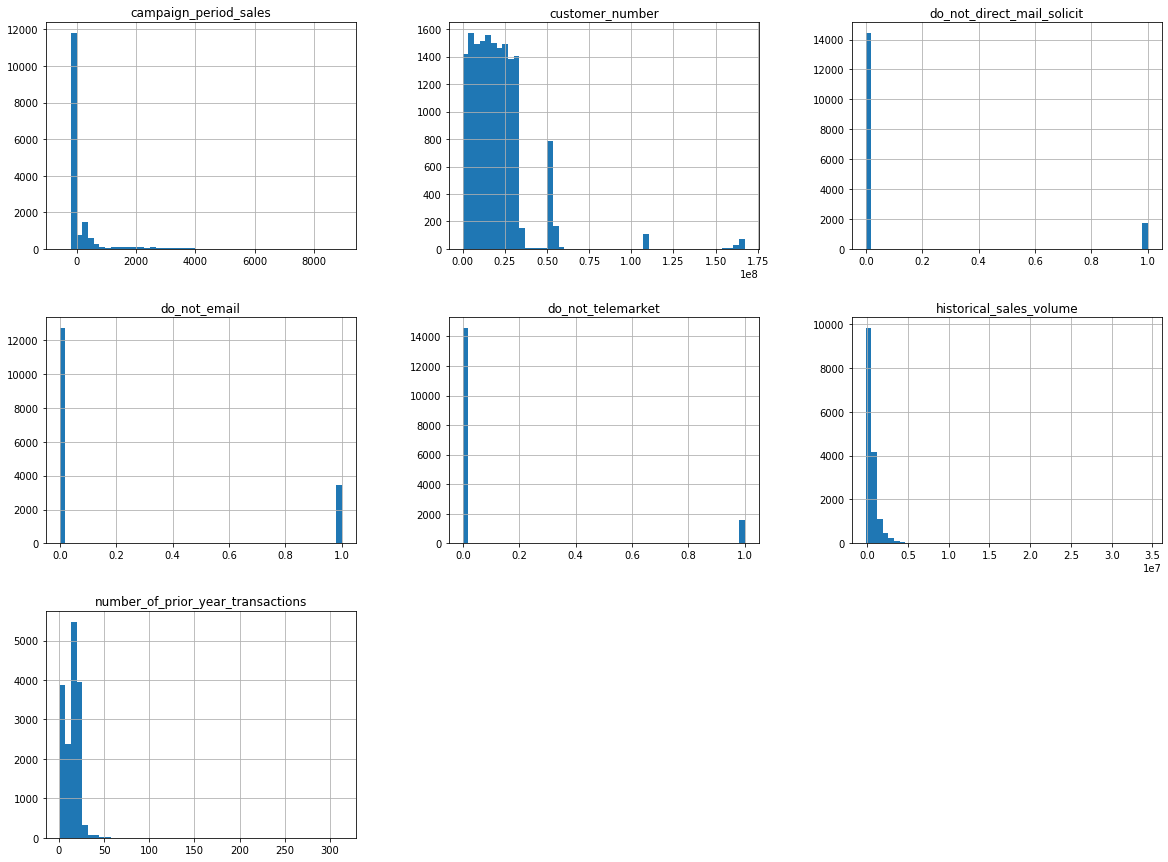

In [42]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Plotting univariate distributions

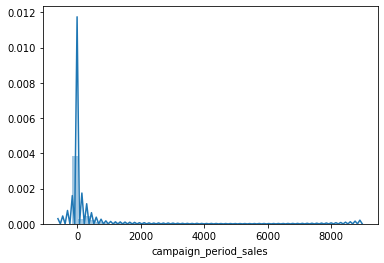

In [43]:
sns.distplot(df['campaign_period_sales']);

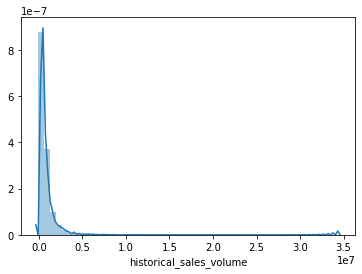

In [44]:
sns.distplot(df['historical_sales_volume']);

In [45]:
def buy_or_not_buy(x):
    if x > 0:
        return 'Buy'
    else:
        return 'Not_Buy'

In [46]:
df['made_purchase'] = df['campaign_period_sales'].apply(buy_or_not_buy)
df.head()

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,made_purchase
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English,Buy
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English,Buy
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,Buy
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English,Not_Buy
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,NaN,Buy


In [47]:
df.columns

Index(['customer_number', 'campaign_period_sales', 'historical_sales_volume',
       'date_of_first_purchase', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'repurchase_method', 'last_transaction_channel', 'desk',
       'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer',
       'insurance', 'toner', 'office_supplies', 'number_of_employees',
       'language', 'made_purchase'],
      dtype='object')

FileNotFoundError: [Errno 2] No such file or directory: 'resources/Fig5.png'

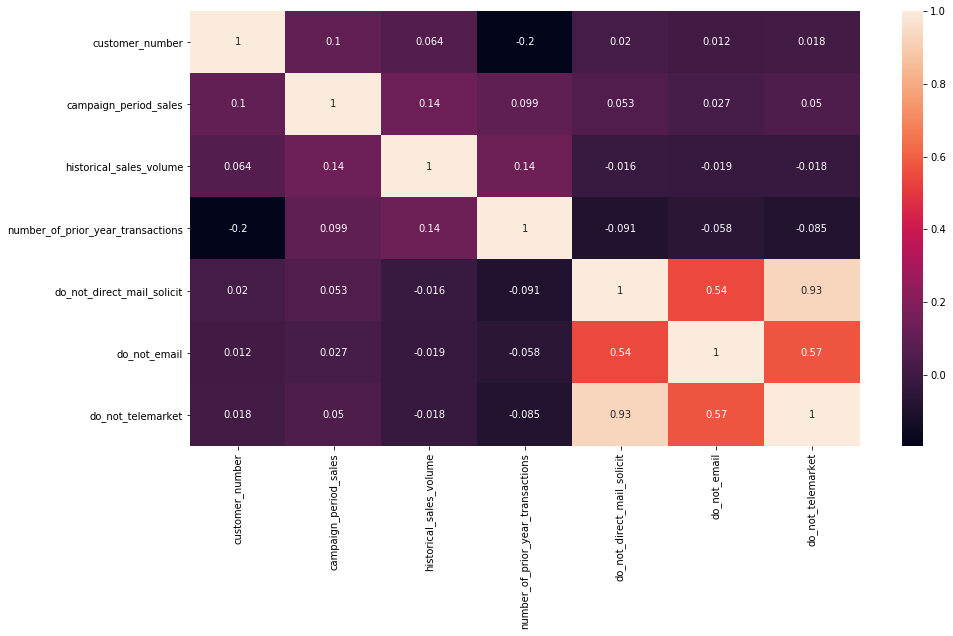

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
# Save Figure
plt.savefig("resources/Fig5.png")

In [ ]:
products = ['desk', 'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer', 'insurance', 'toner', 'office_supplies']
prods = df.loc[:, products]
prods.head()

In [ ]:
def yner(x):
    if x == 'N':
        return 0
    else:
        return 1

In [ ]:
for product in products:
    prods[product] = prods[product].apply(yner)
prods.head()

In [ ]:
df.isnull().sum()

In [ ]:
df[['language', 'last_transaction_channel']].fillna('unknown').head()

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() # transform or normalize the numberical features

In [ ]:
tf= pt.fit_transform(df[['campaign_period_sales', 'historical_sales_volume']])

In [49]:
# fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12,6))
# ax[0, 0].hist(df['campaign_period_sales'])
# ax[0,1].hist(tf[:,0])
# ax[1,0].hist(tf['historical_sales_volume'])
# ax[1,1].hist(tf[:,1]);


In [50]:
df['date_of_first_purchase'] = pd.to_datetime(df['date_of_first_purchase'])
df['year_of_fp']= df['date_of_first_purchase'].dt.year

In [51]:
df['made_purchase'] = df['campaign_period_sales'].apply(buy_or_not_buy)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


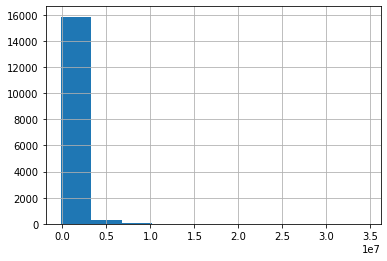

In [52]:
# Normalize the historical_sale_volume
df['historical_sales_volume'].hist()
# plt.hist(np.log(df['historical_sales_volume']))
df['history_log'] = np.log(df['historical_sales_volume'])

In [53]:
df.columns

Index(['customer_number', 'campaign_period_sales', 'historical_sales_volume',
       'date_of_first_purchase', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'repurchase_method', 'last_transaction_channel', 'desk',
       'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer',
       'insurance', 'toner', 'office_supplies', 'number_of_employees',
       'language', 'made_purchase', 'year_of_fp', 'history_log'],
      dtype='object')

In [54]:
def convert_fill_numemploy(val):
    if val == "1-5": return 3
    if val == "6-20": return 8
    if val == "11-50": return 30
    if val == "51-100": return 75
    if val == "1001-500": return 300
    if val == "500+": return 500
    else: return np.nan

In [55]:
df['num_employee_converted'] = df['number_of_employees'].apply(convert_fill_numemploy)

In [56]:
def english_or_not(x):
    if x =='English':
        return 1
    else:
        return 0

In [57]:
df['language'] = df['language'].apply(english_or_not)
df['number_of_employees'] = df['number_of_employees'].apply(convert_fill_numemploy)

In [58]:
def buy_or_not_buy(x):
    if x > 0:
        return 1
    else:
        return 0

In [59]:
def yner(x):
    if x == 'N':
        return 0
    else:
        return 1

In [60]:
df['made_purchase'] = df['campaign_period_sales'].apply(buy_or_not_buy)
df.head()


,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,made_purchase,year_of_fp,history_log,num_employee_converted
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,NaN,1,1,1968.0,11.896850,NaN
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,30.0,1,1,1981.0,12.994494,30.0
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,NaN,1,1,1962.0,13.785531,NaN
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,3.0,1,0,1983.0,12.346676,3.0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,NaN,0,1,1987.0,10.218420,NaN


In [61]:
products = ['desk','executive_chair', 'standard_chair', 'monitor', 'printer', 'computer', 'insurance', 'toner', 'office_supplies']

In [62]:
for product in products:
    df[product] = df[product].apply(yner)
df.head()

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,made_purchase,year_of_fp,history_log,num_employee_converted
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,NaN,1,1,1968.0,11.896850,NaN
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,30.0,1,1,1981.0,12.994494,30.0
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,NaN,1,1,1962.0,13.785531,NaN
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,3.0,1,0,1983.0,12.346676,3.0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,NaN,0,1,1987.0,10.218420,NaN


In [63]:
def repurch_method(x):
    if x =='AUTO RENEW':
        return 1
    else:
        return 0

In [64]:
df['re_purch_method'] = df['repurchase_method'].apply(repurch_method)

In [65]:
def last_tran_chan(x):
    if x =='PHONE':
        return 1
    else:
        return 0

In [66]:
df['last_tran_channel'] = df['last_transaction_channel'].apply(repurch_method)

In [67]:
# X = df[['campaign_period_sales', 'history_log', 'historical_sales_volume', 'number_of_prior_year_transactions', 'year_of_fp', 'made_purchase']].dropna()


X = df[['campaign_period_sales', 'history_log', 'historical_sales_volume',
        'number_of_prior_year_transactions', 'year_of_fp',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket', 'desk',
       'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer',
       'insurance', 'toner', 'office_supplies', 'number_of_employees',
       'language', 'made_purchase', 'year_of_fp', 'history_log',
       'num_employee_converted', 're_purch_method', 'last_tran_channel']].dropna()


X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :-1], X['made_purchase'], test_size =0.5) # 50 vs 30 split
X_train.head()

,campaign_period_sales,history_log,historical_sales_volume,number_of_prior_year_transactions,year_of_fp,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,made_purchase,year_of_fp,history_log,num_employee_converted,re_purch_method
4685,0.0,10.425579,33711.00,2.0,1990.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,3.0,1,0,1990.0,10.425579,3.0,0
13887,0.0,11.340377,84151.76,14.0,1996.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,3.0,1,0,1996.0,11.340377,3.0,0
2375,0.0,12.512181,271626.00,5.0,2016.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,1,75.0,1,0,2016.0,12.512181,75.0,0
4615,0.0,13.482767,716954.16,6.0,1991.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,30.0,1,0,1991.0,13.482767,30.0,1
1398,0.0,12.498324,267888.00,20.0,2012.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,75.0,1,0,2012.0,12.498324,75.0,0


In [68]:
y_train.value_counts()

0    2375
1     893
Name: made_purchase, dtype: int64

In [69]:
y_tr_reg = X_train['campaign_period_sales']
y_test_reg = X_test['campaign_period_sales']

In [70]:
from sklearn.linear_model import LinearRegression, LogisticRegression
clf = LogisticRegression()
clf.fit(X_train.iloc[:, 1:], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
for col, coef in zip(['history', 'num_prior', 'year'], clf.coef_[0]):
    print(col, coef)

history -1.396841242986698e-06
num_prior -8.150848238250452e-08
year -1.6248613927790994e-06


In [72]:
# NB. Two thing we are predicting: whether or not they made a made_purchase - Classification problem and How much they bought - regression problem.

# NB. Put more features later

clf.predict_proba(X_test.iloc[:, 1:]) #we need the second column, the probability of beig +ev
probs = clf.predict_proba(X_test.iloc[:, 1:])[:, 1]
pred = clf.predict(X_test.iloc[:, 1:])

In [73]:
len(X_train)

3268

In [74]:
# Now regerssion Model
from sklearn.linear_model import LinearRegression # regular linear regression

In [75]:
reg = LinearRegression()
reg.fit(X_train.iloc[:, 1:], y_tr_reg)
pred_sales = reg.predict(X_test.iloc[:, 1:])

In [76]:
ans_df = pd.DataFrame({'sales': pred_sales, 'prob': probs}) # 2 models- prediction and regression.

In [82]:
ans_df['profit'] = .22*ans_df['sales'] - 8.4*ans_df['sales'] - 45.65
ans_df.head()

,sales,prob,profit,group
0,428.010231,0.274241,-3546.773693,"(-15022.086, -3453.965]"
1,375.874445,0.276702,-3120.302961,"(-3453.965, -3010.069]"
2,63.572800,0.258234,-565.675502,"(-1936.731, -362.384]"
3,447.039511,0.281072,-3702.433202,"(-15022.086, -3453.965]"
4,232.431959,0.273316,-1946.943427,"(-3010.069, -1936.731]"


In [79]:
ans_df['group'] = pd.qcut(ans_df['profit'], 10, duplicates='drop')

In [80]:
ans_df.groupby('group').mean().sort_values(by='profit', ascending=False)

,sales,prob,profit
group,,,
"(558.549, 1121.127]",-91.748150,0.279357,704.849864
"(365.102, 558.549]",-62.455571,0.277288,465.236574
"(203.754, 365.102]",-40.312510,0.276039,284.106336
"(49.908, 203.754]",-20.903984,0.273677,125.344589
"(-152.663, 49.908]",-0.224959,0.271951,-43.809836
"(-362.384, -152.663]",25.022161,0.269046,-250.331275
"(-1936.731, -362.384]",74.989624,0.265483,-659.065123
"(-3010.069, -1936.731]",330.474087,0.279120,-2748.928029
"(-3453.965, -3010.069]",390.004056,0.274534,-3235.883178


In [312]:
lift_chart = ans_df.groupby('group').mean().sort_values(by='profit', ascending=False)

In [313]:
lift_chart['size'] = ans_df.groupby('group').size()

lift_chart

,sales,prob,profit,size
group,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327


In [314]:
lift_chart['total_profit'] = lift_chart['size'] * lift_chart['profit']

lift_chart

,sales,prob,profit,size,total_profit
group,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06


In [315]:
lift_chart.set_index = [i for i in range(1, 11)]
lift_chart

,sales,prob,profit,size,total_profit
group,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06


In [316]:
avg_profit = lift_chart['profit'].mean()
lift_chart['lift_over_avg'] = lift_chart['profit'] - avg_profit
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg
group,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901


In [317]:
lift_chart['per_of_profit'] = lift_chart['profit']/lift_chart['profit'].sum()
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit
group,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859


In [318]:
lift_chart['incr_proj_profit_100k_cust_base'] = lift_chart['lift_over_avg']*10
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit,incr_proj_profit_100k_cust_base
group,,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679,15848.062901
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675,13295.820488
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192,11926.957758
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457,10534.315274
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484,9122.142559
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874,7383.991792
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570,4010.217916
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322,-18177.192957
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859,-21913.969009


In [319]:
lift_chart['total_proj_profit_100k_cust_base'] = lift_chart['profit']*10
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit,incr_proj_profit_100k_cust_base,total_proj_profit_100k_cust_base
group,,,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679,15848.062901,6396.624312
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675,13295.820488,3844.381899
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192,11926.957758,2475.519169
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457,10534.315274,1082.876685
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484,9122.142559,-329.296030
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874,7383.991792,-2067.446797
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570,4010.217916,-5441.220673
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322,-18177.192957,-27628.631545
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859,-21913.969009,-31365.407598


In [320]:
lift_chart['cuml_proj_profit_100k_cust_base'] = lift_chart['incr_proj_profit_100k_cust_base'].cumsum()
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit,incr_proj_profit_100k_cust_base,total_proj_profit_100k_cust_base,cuml_proj_profit_100k_cust_base
group,,,,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679,15848.062901,6396.624312,1.584806e+04
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675,13295.820488,3844.381899,2.914388e+04
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192,11926.957758,2475.519169,4.107084e+04
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457,10534.315274,1082.876685,5.160516e+04
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484,9122.142559,-329.296030,6.072730e+04
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874,7383.991792,-2067.446797,6.811129e+04
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570,4010.217916,-5441.220673,7.212151e+04
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322,-18177.192957,-27628.631545,5.394432e+04
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859,-21913.969009,-31365.407598,3.203035e+04


In [321]:
lift_chart['cuml_total_profit_100k_cust_base'] = lift_chart['total_proj_profit_100k_cust_base'].cumsum()
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit,incr_proj_profit_100k_cust_base,total_proj_profit_100k_cust_base,cuml_proj_profit_100k_cust_base,cuml_total_profit_100k_cust_base
group,,,,,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679,15848.062901,6396.624312,1.584806e+04,6396.624312
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675,13295.820488,3844.381899,2.914388e+04,10241.006211
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192,11926.957758,2475.519169,4.107084e+04,12716.525381
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457,10534.315274,1082.876685,5.160516e+04,13799.402066
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484,9122.142559,-329.296030,6.072730e+04,13470.106036
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874,7383.991792,-2067.446797,6.811129e+04,11402.659239
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570,4010.217916,-5441.220673,7.212151e+04,5961.438566
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322,-18177.192957,-27628.631545,5.394432e+04,-21667.192980
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859,-21913.969009,-31365.407598,3.203035e+04,-53032.600577


In [322]:
export_csv = lift_chart.to_csv (r'/Users/abullaothuw/Documents/capstone_assignment_office_supply_Store_Data Analysis/tele_marketing_campaign_analysis/resources/lift_chart.csv', header=True)